## Applied Machine Learning:
    Assignment 03
    Sai Lakshmi Nikitha Akarapu
    SXA210112

Seoul Bike Sharing Demand:

Data Set Information:
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


Attribute Information:
Date : year-month-day
Rented Bike count - Count of bikes rented at each hour
Hour - Hour of he day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from IPython.display import Image  
from sklearn import tree
from os import system
import os
import glob

## 1. Data Import:
Import the given datasets. Explore shape and size.

In [2]:
Dataset = pd.read_csv("SeoulBikeData.csv", encoding = 'unicode_escape')

In [3]:
Dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [4]:
Dataset.loc[Dataset['Holiday'] == "Holiday"]

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
504   22/12/2017                196     0             -1.7           79   
505   22/12/2017                250     1             -1.6           79   
506   22/12/2017                161     2             -1.1           79   
507   22/12/2017                 99     3             -0.6           76   
508   22/12/2017                 64     4             -0.3           76   
...          ...                ...   ...              ...          ...   
7507  09/10/2018                  0    19             17.3           47   
7508  09/10/2018                  0    20             17.0           49   
7509  09/10/2018                  0    21             16.8           52   
7510  09/10/2018                  0    22             16.7           55   
7511  09/10/2018                  0    23             16.6           53   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
504                0.5               794                       -4.8   
505                0.6               784                       -4.7   
506                0.7               736                       -4.2   
507                0.5               789                       -4.3   
508                0.9               760                       -4.0   
...                ...               ...                        ...   
7507               2.2              2000                        5.8   
7508               1.4              2000                        6.1   
7509               1.6              2000                        6.8   
7510               1.9              2000                        7.6   
7511               1.1              2000                        6.9   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  Holiday  \
504                       0.0           0.0            0.8  Winter  Holiday   
505                       0.0           0.0            0.8  Winter  Holiday   
506                       0.0           0.0            0.8  Winter  Holiday   
507                       0.0           0.0            0.7  Winter  Holiday   
508                       0.0           0.0            0.7  Winter  Holiday   
...                       ...           ...            ...     ...      ...   
7507                      0.0           0.0            0.0  Autumn  Holiday   
7508                      0.0           0.0            0.0  Autumn  Holiday   
7509                      0.0           0.0            0.0  Autumn  Holiday   
7510                      0.0           0.0            0.0  Autumn  Holiday   
7511                      0.0           0.0            0.0  Autumn  Holiday   

     Functioning Day  
504              Yes  
505              Yes  
506              Yes  
507              Yes  
508              Yes  
...              ...  
7507              No  
7508              No  
7509              No  
7510              No  
7511              No  

[432 rows x 14 columns]

In [5]:
Dataset.shape

(8760, 14)

Number of rows and columns in the dataframe is 8760 and 14 respectively.

In [6]:
Dataset.size

122640

The size of dataframe is 122640 which is equivalent to total number of rows*columns

In [7]:
Dataset['Snowfall (cm)'].unique()

array([0. , 0.1, 0.3, 0.4, 0.2, 1. , 0.9, 0.8, 0.7, 0.6, 2.7, 4. , 4.1,
       4.3, 3.9, 3.1, 2.1, 1.4, 0.5, 1.3, 1.8, 2. , 4.8, 5.1, 5. , 4.2,
       3.2, 2.6, 2.5, 2.3, 2.2, 1.9, 1.7, 1.6, 2.4, 1.2, 1.1, 3. , 3.3,
       3.5, 3.4, 2.8, 1.5, 3.8, 3.7, 7.1, 8.8, 7. , 6. , 3.6, 2.9])

In [8]:
Dataset['Snowfall (cm)'].unique()

array([0. , 0.1, 0.3, 0.4, 0.2, 1. , 0.9, 0.8, 0.7, 0.6, 2.7, 4. , 4.1,
       4.3, 3.9, 3.1, 2.1, 1.4, 0.5, 1.3, 1.8, 2. , 4.8, 5.1, 5. , 4.2,
       3.2, 2.6, 2.5, 2.3, 2.2, 1.9, 1.7, 1.6, 2.4, 1.2, 1.1, 3. , 3.3,
       3.5, 3.4, 2.8, 1.5, 3.8, 3.7, 7.1, 8.8, 7. , 6. , 3.6, 2.9])

## 2. Data Preparation tasks:

Handling Missing values

Convert categorical variables to continuous using functional knowledge

And Drop attribute/s if required


In [9]:
# Explore data types
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
# Missing Values
Dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

From the above output, we can conclude that there are no missing values in the dataset.

In [11]:
Dataset.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

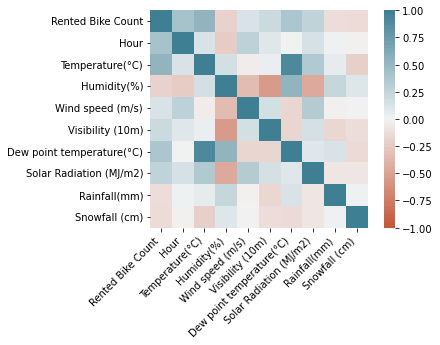

In [12]:
corr = Dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<AxesSubplot:xlabel='Date', ylabel='Dew point temperature(°C)'>

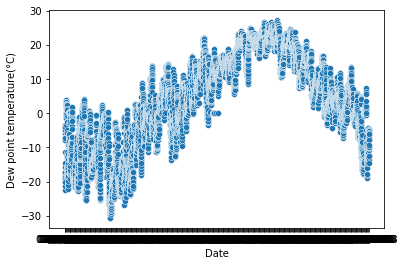

In [13]:
sns.scatterplot(x='Date', y='Dew point temperature(°C)', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

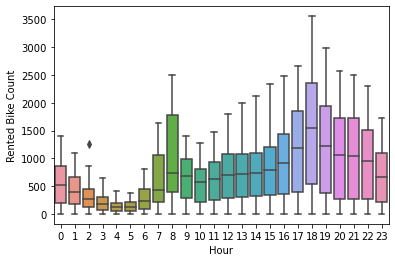

In [14]:
sns.boxplot(x = 'Hour', y = 'Rented Bike Count', data = Dataset)

## Data Cleaning:
Converting categories to dummies

In [15]:
# Automate categorical vs numerical variables separation
Summary=Dataset.describe().T
Conti=Summary.index
Column_name=Dataset.columns
All=[]
for i in range(len(Conti)):
    for j in range(len(Column_name)):
        if Conti[i]!=Column_name[j]:
            All.append(Column_name[j])
Categorical=list(set(All)-set(Conti))
Continuous=list(set(All)-set(Categorical))
print("Continuous Variables:",Continuous)
print("\nCategorical variables found in the dataset:\n",Categorical)

Continuous Variables: ['Solar Radiation (MJ/m2)', 'Snowfall (cm)', 'Rented Bike Count', 'Dew point temperature(°C)', 'Hour', 'Visibility (10m)', 'Wind speed (m/s)', 'Humidity(%)', 'Temperature(°C)', 'Rainfall(mm)']

Categorical variables found in the dataset:
 ['Date', 'Seasons', 'Holiday', 'Functioning Day']


In [16]:
pd.unique(Dataset.Seasons)

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [17]:
Dataset['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
pd.unique(Dataset.Holiday)

array(['No Holiday', 'Holiday'], dtype=object)

Coverting date to year, month, day colums

In [19]:
Dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [20]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Creating dummies for Seasons categorical variable

In [21]:
dummies = pd.get_dummies(Dataset.Seasons)
Dataset = pd.concat([Dataset, dummies], axis='columns')
Dataset = Dataset.drop(['Seasons','Autumn'], axis=1) 
Dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)     Holiday  \
0                      0.0           0.0            0.0  No Holiday   
1                      0.0           0.0            0.0  No Holiday   
2                      0.0           0.0            0.0  No Holiday   
3                      0.0           0.0            0.0  No Holiday   
4                      0.0           0.0            0.0  No Holiday   

  Functioning Day  Spring  Summer  Winter  
0             Yes       0       0       1  
1             Yes       0       0       1  
2             Yes       0       0       1  
3             Yes       0       0       1  
4             Yes       0       0       1

Converting Functioning Day and Holiday columns to binaries

In [22]:
Dataset['Functioning Day'] = Dataset['Functioning Day'].map(
                   {'Yes':1 ,'No':0})

In [23]:
Dataset['Holiday'] = Dataset['Holiday'].map(
                   {'Holiday':1 ,'No Holiday':0})

In [24]:
Dataset = Dataset.drop('Date', axis =1)

In [25]:
Dataset.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Holiday  Functioning Day  Spring  Summer  \
0           0.0            0.0        0                1       0       0   
1           0.0            0.0        0                1       0       0   
2           0.0            0.0        0                1       0       0   
3           0.0            0.0        0                1       0       0   
4           0.0            0.0        0                1       0       0   

   Winter  
0       1  
1       1  
2       1  
3       1  
4       1

#### Exploratory Data Analysis:

array([[<AxesSubplot:title={'center':'Hour'}>,
        <AxesSubplot:title={'center':'Temperature(°C)'}>,
        <AxesSubplot:title={'center':'Humidity(%)'}>],
       [<AxesSubplot:title={'center':'Wind speed (m/s)'}>,
        <AxesSubplot:title={'center':'Visibility (10m)'}>,
        <AxesSubplot:title={'center':'Dew point temperature(°C)'}>],
       [<AxesSubplot:title={'center':'Solar Radiation (MJ/m2)'}>,
        <AxesSubplot:title={'center':'Rainfall(mm)'}>,
        <AxesSubplot:title={'center':'Snowfall (cm)'}>],
       [<AxesSubplot:title={'center':'Holiday'}>,
        <AxesSubplot:title={'center':'Functioning Day'}>,
        <AxesSubplot:title={'center':'Spring'}>],
       [<AxesSubplot:title={'center':'Summer'}>,
        <AxesSubplot:title={'center':'Winter'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSu

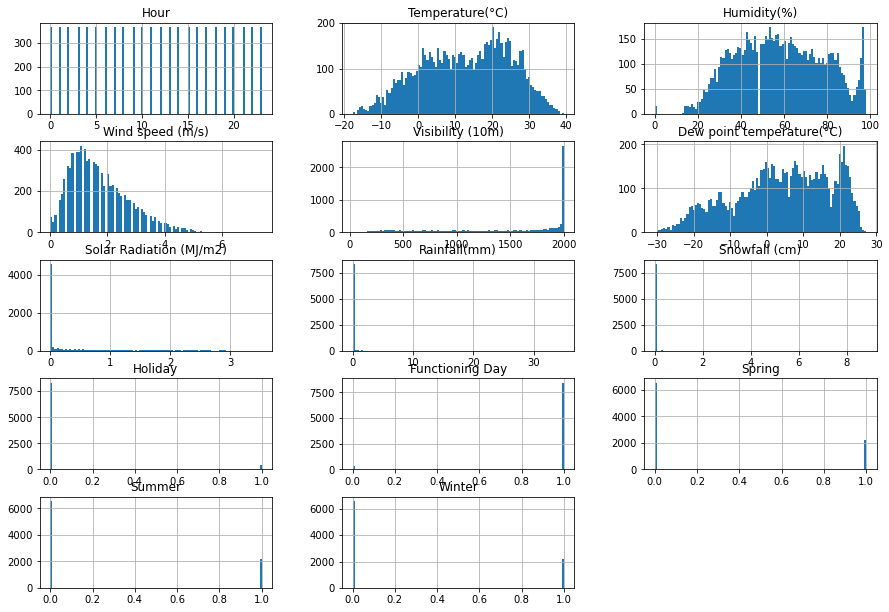

In [26]:
Dataset.hist(column=list(Dataset)[1:], figsize=(15,30),bins=100, layout=(14,3))

array([[<AxesSubplot:title={'center':'Solar Radiation (MJ/m2)'}>]],
      dtype=object)

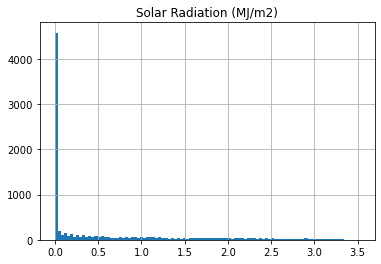

In [27]:
Dataset.hist(column='Solar Radiation (MJ/m2)',bins=100)

array([[<AxesSubplot:title={'center':'Rented Bike Count'}>]], dtype=object)

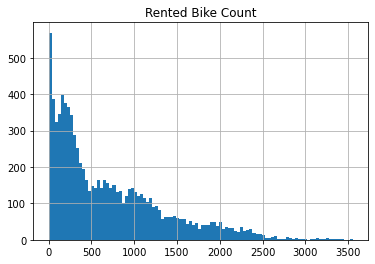

In [28]:
Dataset.hist(column='Rented Bike Count', bins=100)

In [29]:
Dataset.skew(axis=0, skipna=True, level=None)

Rented Bike Count             1.153428
Hour                          0.000000
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
Holiday                       4.163603
Functioning Day              -5.170969
Spring                        1.142294
Summer                        1.142294
Winter                        1.176139
dtype: float64

In [30]:
Dataset.corr()

Rented Bike Count          Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  4.102573e-01         0.538558   
Hour                                0.410257  1.000000e+00         0.124114   
Temperature(°C)                     0.538558  1.241145e-01         1.000000   
Humidity(%)                        -0.199780 -2.416438e-01         0.159371   
Wind speed (m/s)                    0.121108  2.851967e-01        -0.036252   
Visibility (10m)                    0.199280  9.875348e-02         0.034794   
Dew point temperature(°C)           0.379788  3.054372e-03         0.912798   
Solar Radiation (MJ/m2)             0.261837  1.451309e-01         0.353505   
Rainfall(mm)                       -0.123074  8.714642e-03         0.050282   
Snowfall (cm)                      -0.141804 -2.151645e-02        -0.218405   
Holiday                            -0.072338 -1.391486e-16        -0.055931   
Functioning Day                     0.203943  5.439377e-03        -0.050170   
Spring                              0.022888 -1.159917e-15         0.007960   
Summer                              0.296549  8.578102e-16         0.665846   
Winter                             -0.424925 -1.697335e-15        -0.738720   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.199780          0.121108          0.199280   
Hour                         -0.241644          0.285197          0.098753   
Temperature(°C)               0.159371         -0.036252          0.034794   
Humidity(%)                   1.000000         -0.336683         -0.543090   
Wind speed (m/s)             -0.336683          1.000000          0.171507   
Visibility (10m)             -0.543090          0.171507          1.000000   
Dew point temperature(°C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)      -0.461919          0.332274          0.149738   
Rainfall(mm)                  0.236397         -0.019674         -0.167629   
Snowfall (cm)                 0.108183         -0.003554         -0.121695   
Holiday                      -0.050278          0.023017          0.031773   
Functioning Day              -0.020800          0.005037         -0.026000   
Spring                        0.015694          0.083855         -0.187498   
Summer                        0.192595         -0.064698          0.061958   
Winter                       -0.238295          0.109186          0.008616   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Hour                                        0.003054                 0.145131   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   
Holiday                                    -0.066759                -0.005077   
Functioning Day                            -0.052837                -0.007665   
Spring                                      0.002056                 0.079974   
Summer                                      0.652378                 0.128402   
Winter                                     -0.722366                -0.178420   

                           Rainfall(mm)  Snowfall (cm)       Holiday  \
Rented Bike Count             -0.123074      -0.141804 -7.233757e-02   
Hour                           0.008715      -0.021516 -1.391486e-16   


In [31]:
def plot_corr(Dataset, size=26):
    corr = Dataset.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

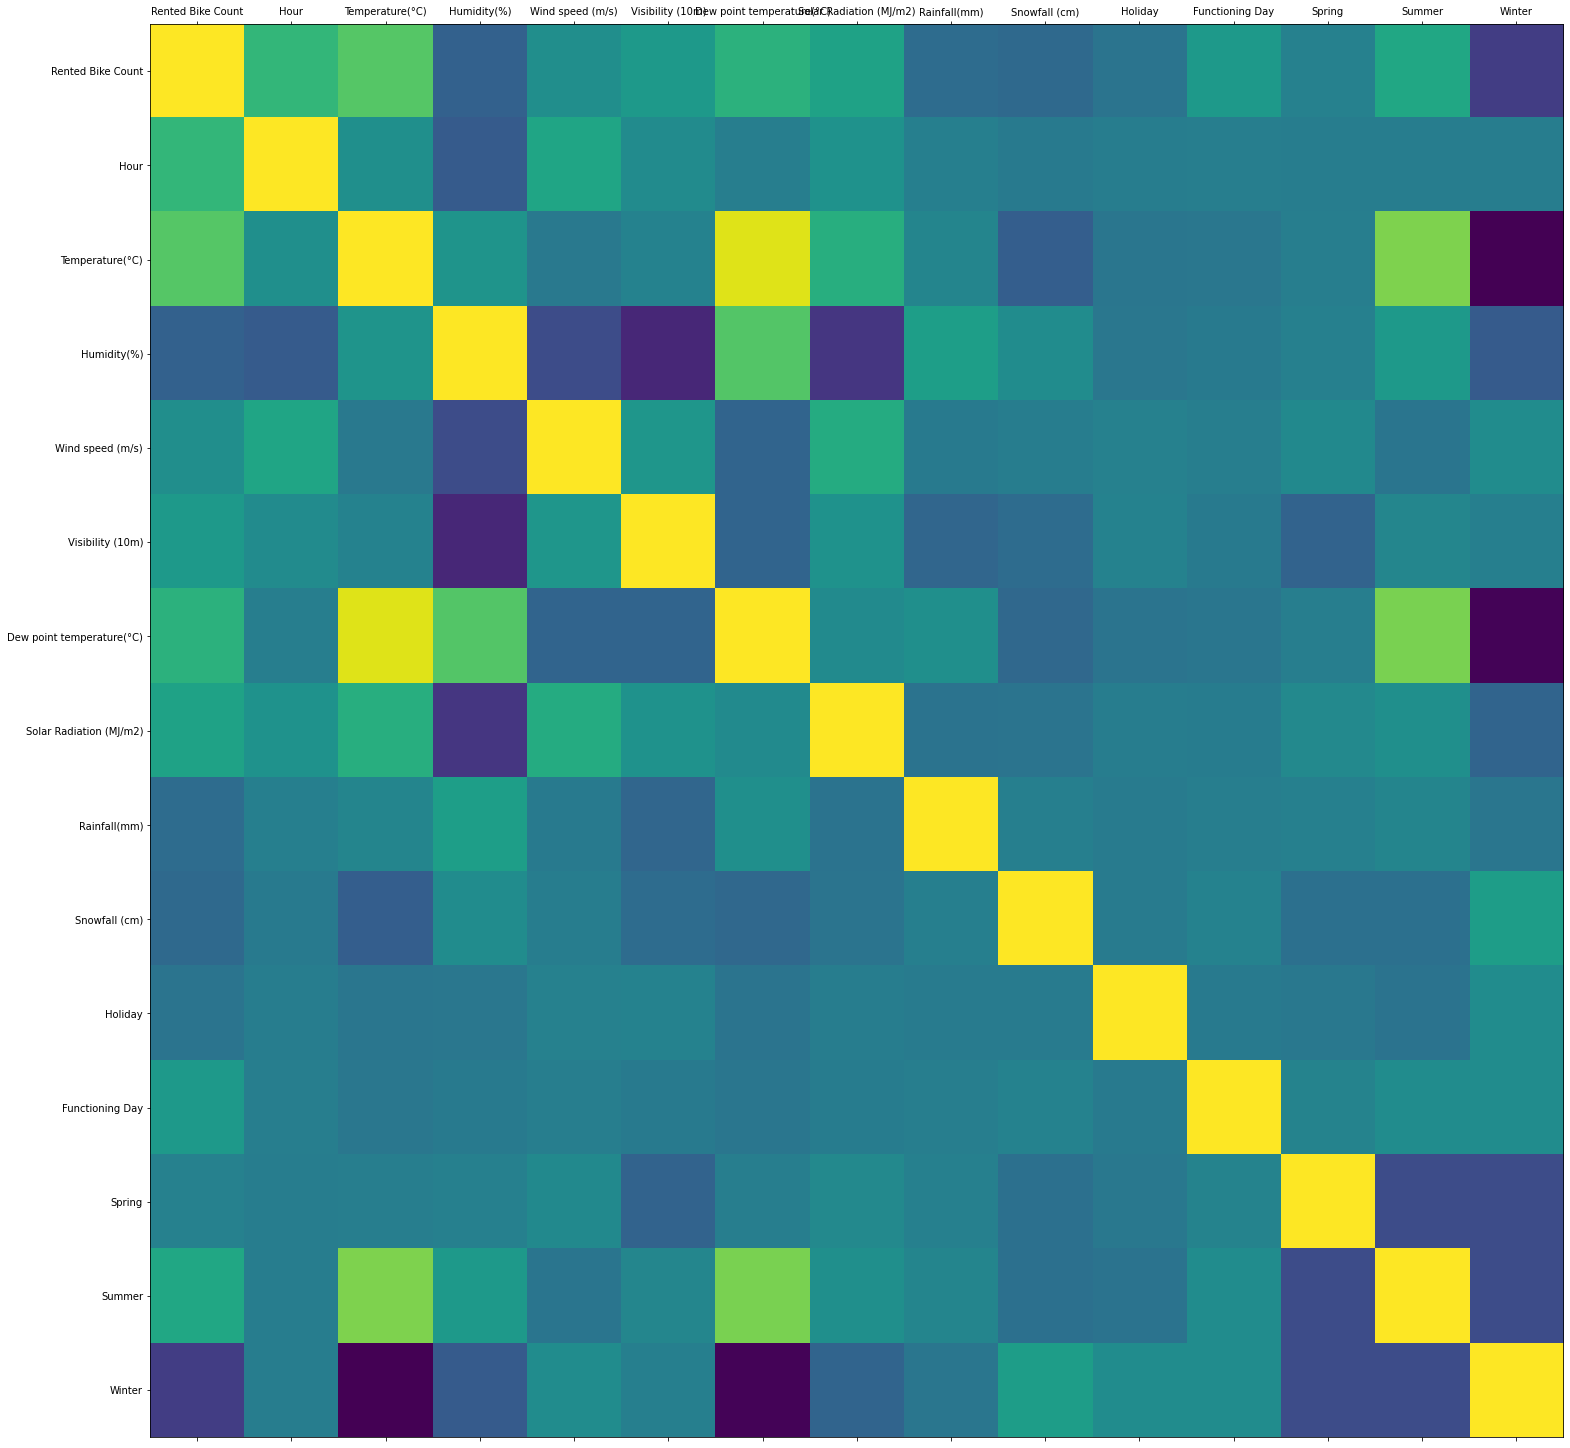

In [32]:
plot_corr(Dataset)

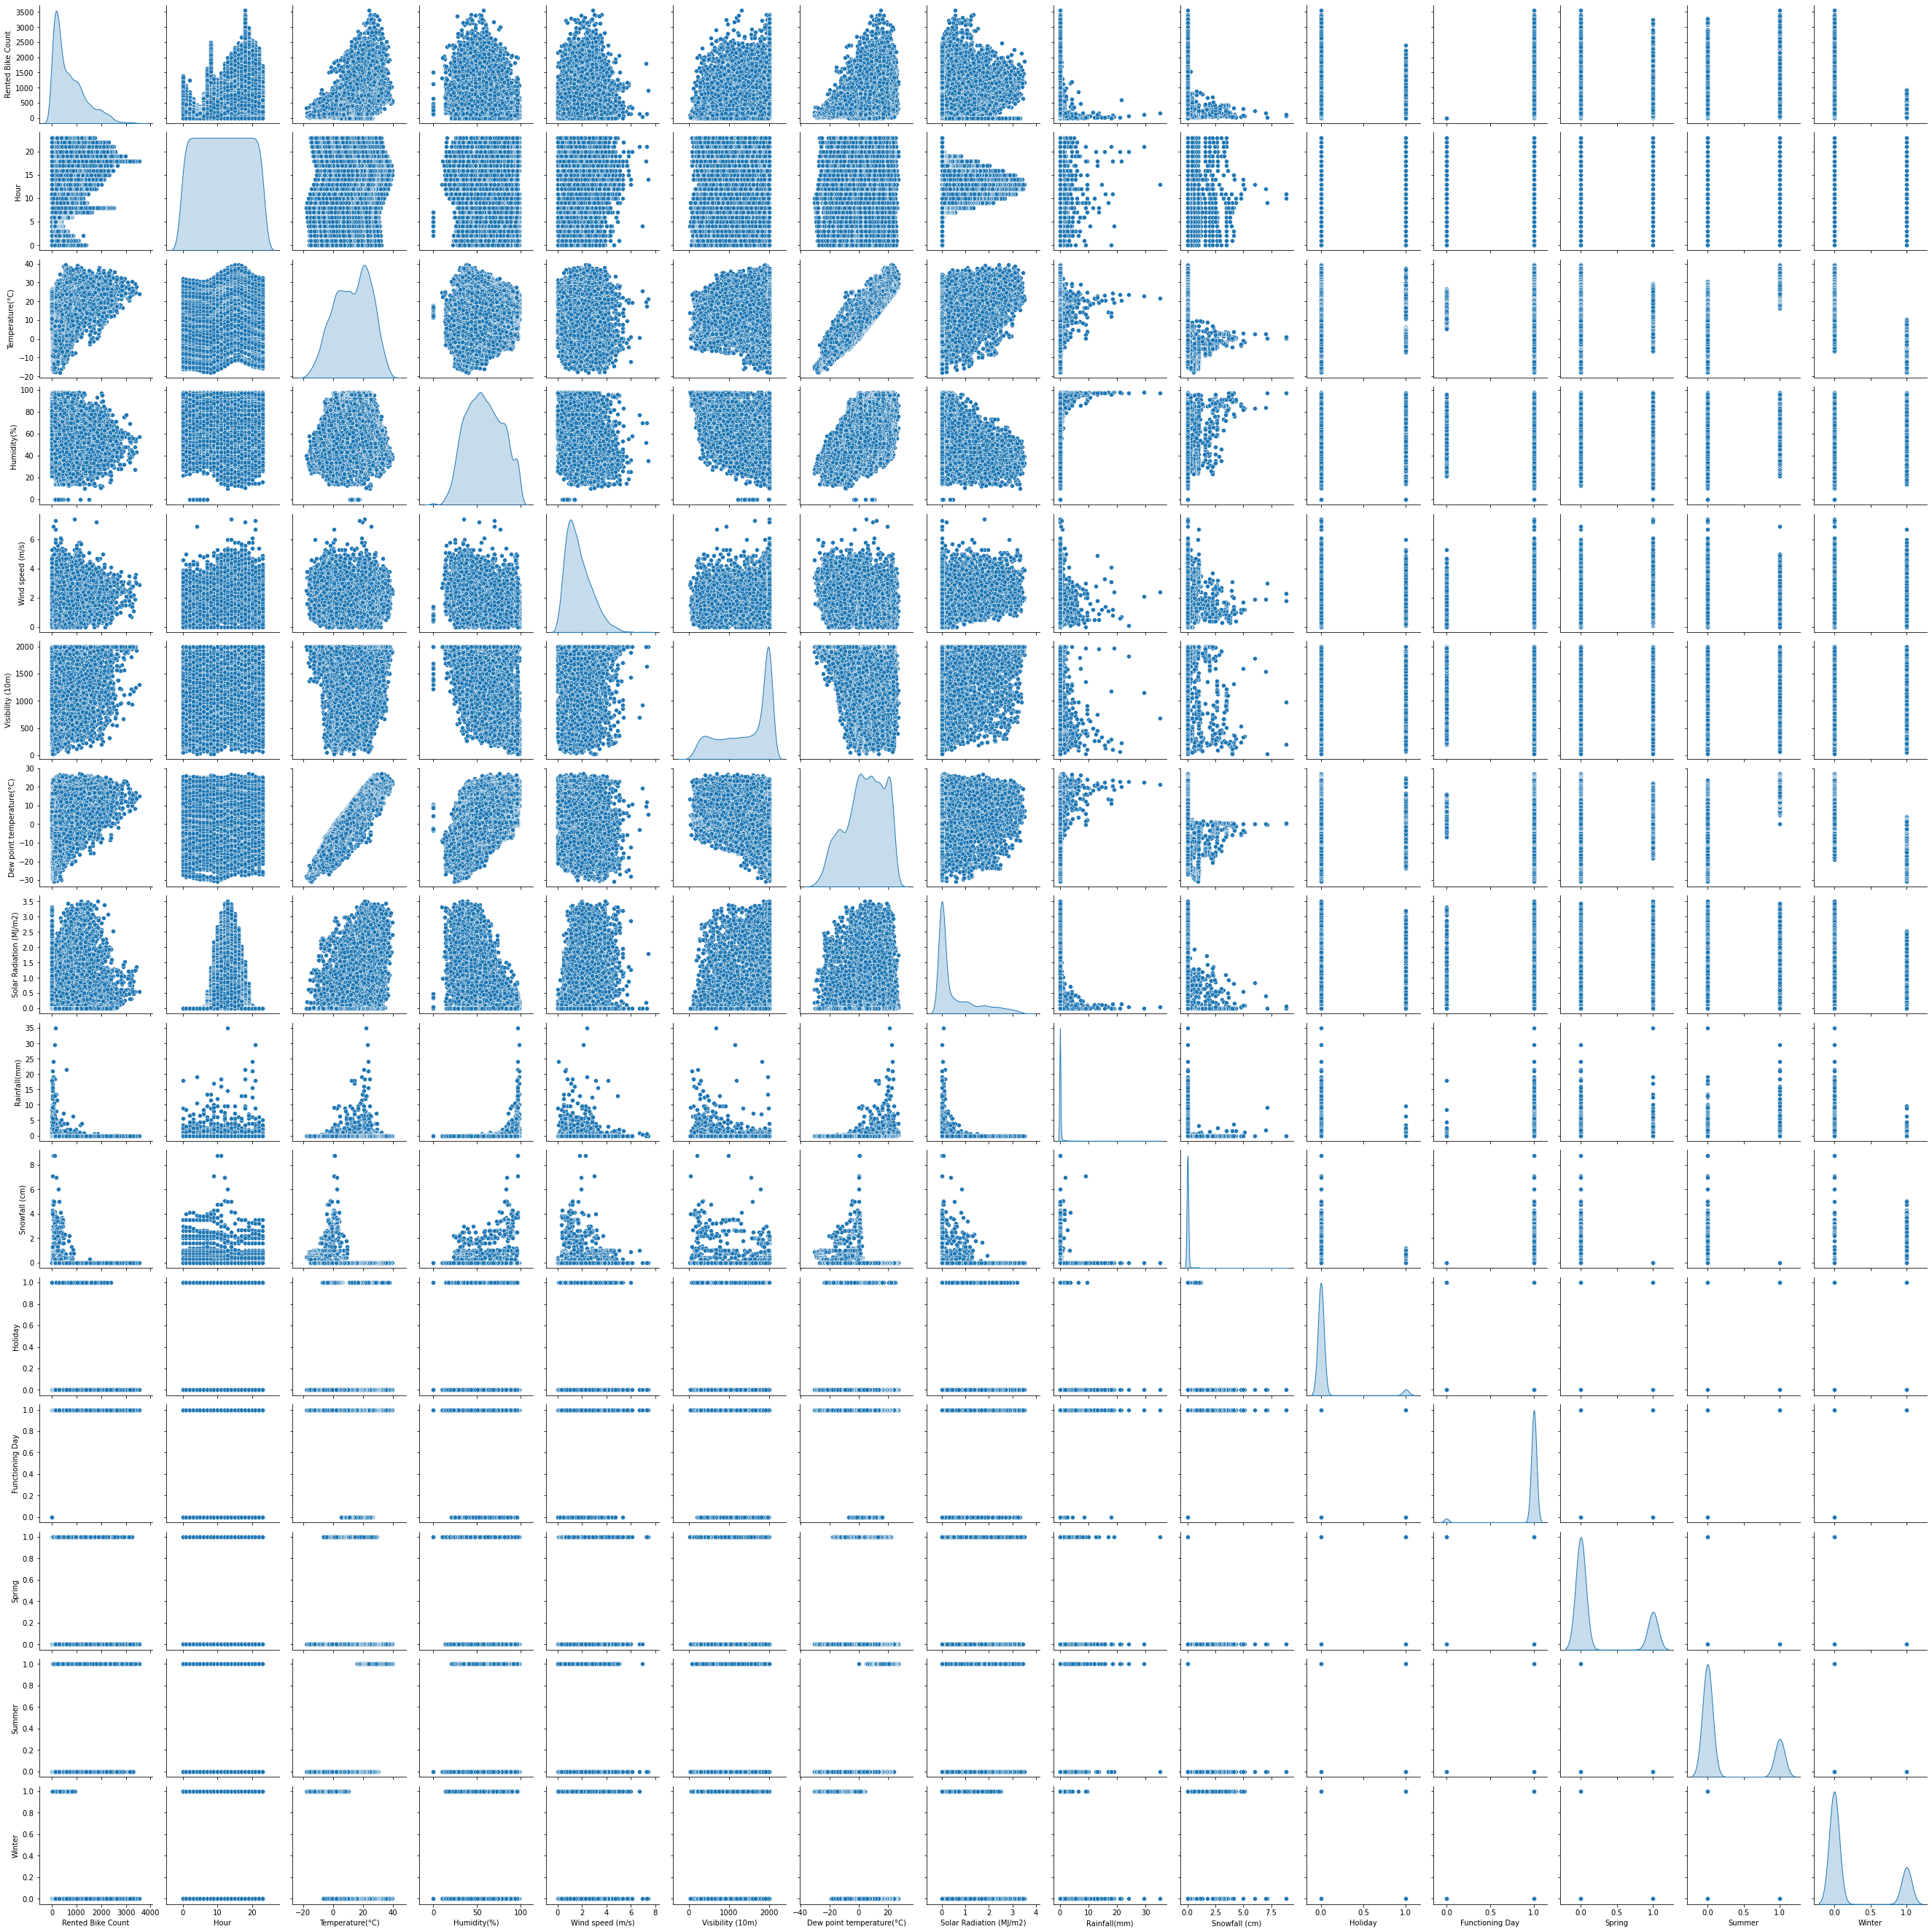

In [33]:
sns.pairplot(Dataset,diag_kind='kde')

<AxesSubplot:xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

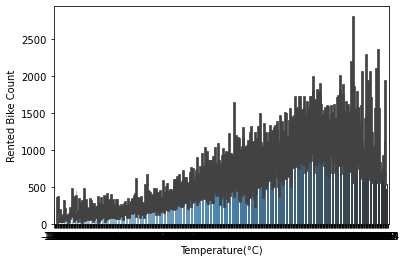

In [34]:
sns.barplot(x='Temperature(°C)', y='Rented Bike Count', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

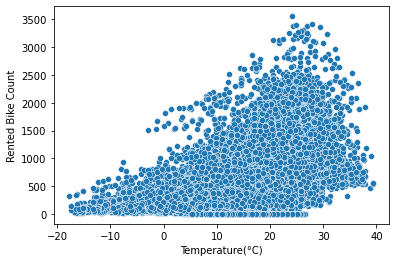

In [35]:
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Temperature(°C)', ylabel='Dew point temperature(°C)'>

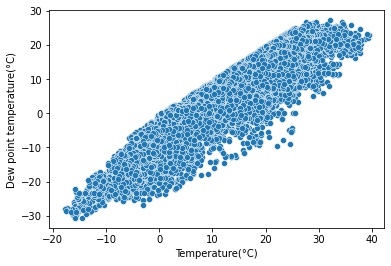

In [36]:
sns.scatterplot(x='Temperature(°C)', y='Dew point temperature(°C)', data=Dataset, palette='Blues_d')

From the above plot, we can observe the perfect linear relation between temperature and Dew point temperature. Due to collinearity issue, dropping one of the variables.

In [37]:
Dataset = Dataset.drop('Dew point temperature(°C)', axis =1)

In [38]:
Dataset.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  Functioning Day  Spring  Summer  Winter  
0        0                1       0       0       1  
1        0                1       0       0       1  
2        0                1       0       0       1  
3        0                1       0       0       1  
4        0                1       0       0       1

In [39]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Spring                   8760 non-null   uint8  
 12  Summer                   8760 non-null   uint8  
 13  Winter                   8760 non-null   uint8  
dtypes: float64(5), int64(6),

<AxesSubplot:xlabel='Humidity(%)', ylabel='Rented Bike Count'>

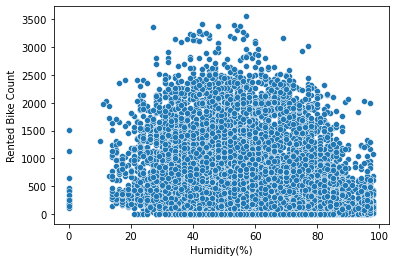

In [40]:
sns.scatterplot(y='Rented Bike Count', x='Humidity(%)', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Visibility (10m)', ylabel='Rented Bike Count'>

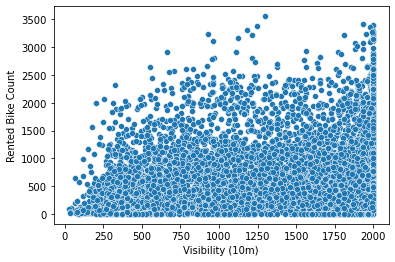

In [41]:
sns.scatterplot(y='Rented Bike Count', x='Visibility (10m)', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Humidity(%)', ylabel='Rented Bike Count'>

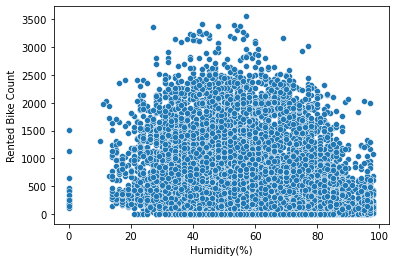

In [42]:
sns.scatterplot(y='Rented Bike Count', x='Humidity(%)', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Wind speed (m/s)'>

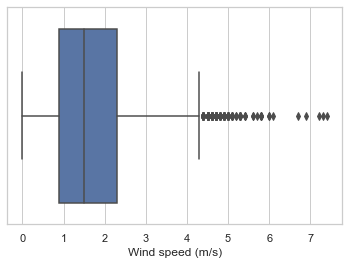

In [43]:
sns.set_theme(style="whitegrid")
sns.boxplot(x='Wind speed (m/s)', data = Dataset)

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)'>

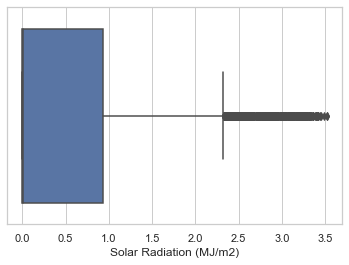

In [44]:
sns.set_theme(style="whitegrid")
sns.boxplot(x='Solar Radiation (MJ/m2)', data = Dataset)

<AxesSubplot:xlabel='Functioning Day', ylabel='Rented Bike Count'>

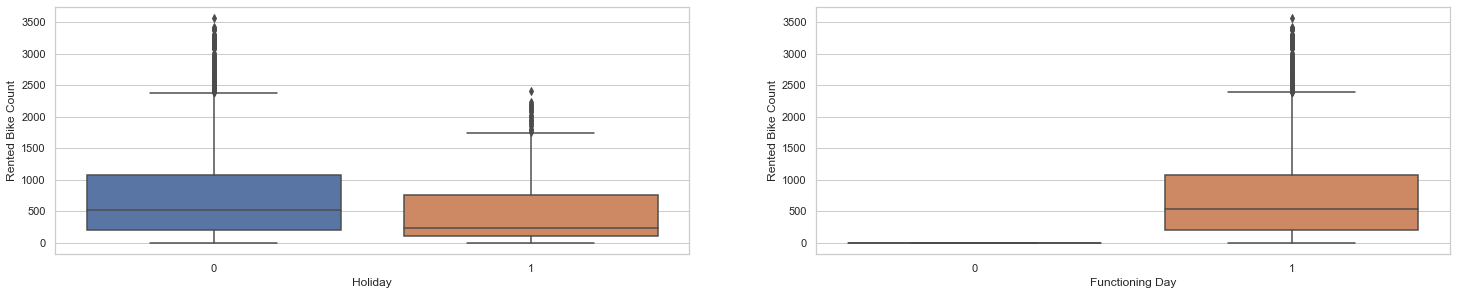

In [45]:
plt.figure(figsize=(25, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'Holiday', y = 'Rented Bike Count', data = Dataset)
plt.subplot(2,2,2)
sns.boxplot(x = 'Functioning Day', y = 'Rented Bike Count', data = Dataset)

array([[<AxesSubplot:title={'center':'Rented Bike Count'}>]], dtype=object)

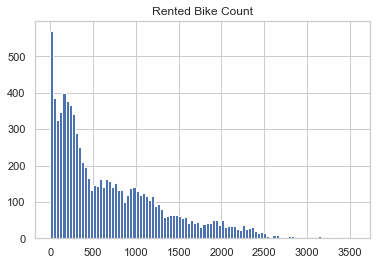

In [46]:
Dataset.hist(column='Rented Bike Count', bins=100)

In [47]:
median = statistics.median(Dataset['Rented Bike Count'])
median

504.5

In [48]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Spring                   8760 non-null   uint8  
 12  Summer                   8760 non-null   uint8  
 13  Winter                   8760 non-null   uint8  
dtypes: float64(5), int64(6),

In [1]:
Dataset['Rented Bike Count'].where(Dataset['Rented Bike Count'] > median, 1, inplace = True)
Dataset['Rented Bike Count'].where(Dataset['Rented Bike Count'] <= median, 0, inplace = True)

NameError: name 'Dataset' is not defined

## Experimentation 1:

In [49]:
X = Dataset.drop("Rented Bike Count", axis=1)
y = Dataset['Rented Bike Count']

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hour                     8760 non-null   int64  
 1   Temperature(°C)          8760 non-null   float64
 2   Humidity(%)              8760 non-null   int64  
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   int64  
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Holiday                  8760 non-null   int64  
 9   Functioning Day          8760 non-null   int64  
 10  Spring                   8760 non-null   uint8  
 11  Summer                   8760 non-null   uint8  
 12  Winter                   8760 non-null   uint8  
dtypes: float64(5), int64(5), uint8(3)
memory usage: 710.2 KB


In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
XScaled=sc.fit_transform(X)
XScaled=pd.DataFrame(XScaled)
XScaled.columns=['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Holiday','Functioning Day','Spring','Summer','Winter']
XScaled.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0 -1.661325        -1.513957    -1.042483          0.458476          0.925871   
1 -1.516862        -1.539074    -0.993370         -0.892561          0.925871   
2 -1.372399        -1.580936    -0.944257         -0.699556          0.925871   
3 -1.227936        -1.597680    -0.895144         -0.796059          0.925871   
4 -1.083473        -1.580936    -1.091596          0.554978          0.925871   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)   Holiday  \
0                -0.655132       -0.1318      -0.171891 -0.227757   
1                -0.655132       -0.1318      -0.171891 -0.227757   
2                -0.655132       -0.1318      -0.171891 -0.227757   
3                -0.655132       -0.1318      -0.171891 -0.227757   
4                -0.655132       -0.1318      -0.171891 -0.227757   

   Functioning Day    Spring    Summer    Winter  
0          0.18668 -0.580514 -0.580514  1.748015  
1          0.18668 -0.580514 -0.580514  1.748015  
2          0.18668 -0.580514 -0.580514  1.748015  
3          0.18668 -0.580514 -0.580514  1.748015  
4          0.18668 -0.580514 -0.580514  1.748015

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledDataset=sc.fit_transform(Dataset)
scaledDataset=pd.DataFrame(Dataset)
scaledDataset.columns=['Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Holiday','Functioning Day','Spring','Summer','Winter']
scaledDataset.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  Functioning Day  Spring  Summer  Winter  
0        0                1       0       0       1  
1        0                1       0       0       1  
2        0                1       0       0       1  
3        0                1       0       0       1  
4        0                1       0       0       1

In [53]:
XScaled.describe()

Hour  Temperature(°C)   Humidity(%)  Wind speed (m/s)  \
count  8.760000e+03     8.760000e+03  8.760000e+03      8.760000e+03   
mean   1.520853e-19    -7.169557e-16  1.837825e-16     -1.358312e-16   
std    1.000057e+00     1.000057e+00  1.000057e+00      1.000057e+00   
min   -1.661325e+00    -2.568868e+00 -2.859660e+00     -1.664583e+00   
25%   -8.306624e-01    -7.855668e-01 -7.969184e-01     -7.960588e-01   
50%    0.000000e+00     6.840822e-02 -6.022497e-02     -2.170429e-01   
75%    8.306624e-01     8.051710e-01  7.746943e-01      5.549784e-01   
max    1.661325e+00     2.220090e+00  1.953404e+00      5.476614e+00   

       Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
count      8.760000e+03             8.760000e+03  8.760000e+03   8.760000e+03   
mean       2.045599e-15            -4.465327e-15  1.918810e-15  -1.404875e-14   
std        1.000057e+00             1.000057e+00  1.000057e+00   1.000057e+00   
min       -2.317786e+00            -6.551317e-01 -1.317999e-01  -1.718911e-01   
25%       -8.167930e-01            -6.551317e-01 -1.317999e-01  -1.718911e-01   
50%        4.293764e-01            -6.436202e-01 -1.317999e-01  -1.718911e-01   
75%        9.258713e-01             4.154376e-01 -1.317999e-01  -1.718911e-01   
max        9.258713e-01             3.396916e+00  3.089303e+01   1.997826e+01   

            Holiday  Functioning Day        Spring        Summer        Winter  
count  8.760000e+03     8.760000e+03  8.760000e+03  8.760000e+03  8.760000e+03  
mean   6.269807e-15     1.335965e-14  2.811376e-14  2.811376e-14 -4.037732e-14  
std    1.000057e+00     1.000057e+00  1.000057e+00  1.000057e+00  1.000057e+00  
min   -2.277569e-01    -5.356764e+00 -5.805139e-01 -5.805139e-01 -5.720776e-01  
25%   -2.277569e-01     1.866799e-01 -5.805139e-01 -5.805139e-01 -5.720776e-01  
50%   -2.277569e-01     1.866799e-01 -5.805139e-01 -5.805139e-01 -5.720776e-01  
75%   -2.277569e-01     1.866799e-01  1.722612e+00  1.722612e+00 -5.720776e-01  
max    4.390647e+00     1.866799e-01  1.722612e+00  1.722612e+00  1.748015e+00

In [54]:
scaledDataset.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  \
count       8760.000000       8760.000000              8760.000000   
mean           1.724909       1436.825799                 0.569111   
std            1.036300        608.298712                 0.868746   
min            0.000000         27.000000                 0.000000   
25%            0.900000        940.000000                 0.000000   
50%            1.500000       1698.000000                 0.010000   
75%            2.300000       2000.000000                 0.930000   
max            7.400000       2000.000000                 3.520000   

       Rainfall(mm)  Snowfall (cm)      Holiday  Functioning Day       Spring  \
count   8760.000000    8760.000000  8760.000000      8760.000000  8760.000000   
mean       0.148687       0.075068     0.049315         0.966324     0.252055   
std        1.128193       0.436746     0.216537         0.180404     0.434217   
min        0.000000       0.000000     0.000000         0.000000     0.000000   
25%        0.000000       0.000000     0.000000         1.000000     0.000000   
50%        0.000000       0.000000     0.000000         1.000000     0.000000   
75%        0.000000       0.000000     0.000000         1.000000     1.000000   
max       35.000000       8.800000     1.000000         1.000000     1.000000   

            Summer       Winter  
count  8760.000000  8760.000000  
mean      0.252055     0.246575  
std       0.434217     0.431042  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       1.000000     0.000000  
max       1.000000     1.000000

### K Means Clustering

In [55]:
x = XScaled.iloc[:,[4,1]].values
XScaled.iloc[:,[4,1]].head()

Visibility (10m)  Temperature(°C)
0          0.925871        -1.513957
1          0.925871        -1.539074
2          0.925871        -1.580936
3          0.925871        -1.597680
4          0.925871        -1.580936

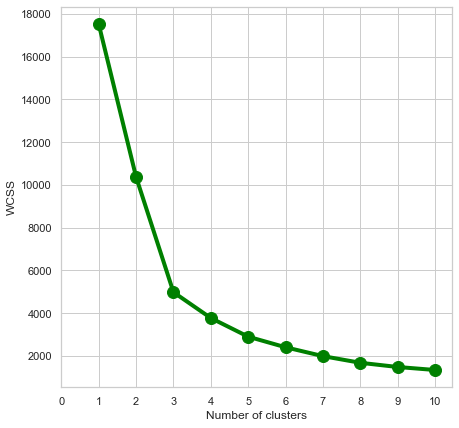

In [56]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

#### From above elbow method we can say that we can take 3 clusters .

In [57]:
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [58]:
Dataset['Cluster_KM']=model.labels_

In [59]:
Dataset.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  Functioning Day  Spring  Summer  Winter  Cluster_KM  
0        0                1       0       0       1           2  
1        0                1       0       0       1           2  
2        0                1       0       0       1           2  
3        0                1       0       0       1           2  
4        0                1       0       0       1           2

In [60]:
DatasetClust = Dataset.groupby(['Cluster_KM'])
DatasetClust.mean()

Rented Bike Count       Hour  Temperature(°C)  Humidity(%)  \
Cluster_KM                                                               
0                  528.953108  10.646818        11.755601    72.613323   
1                 1084.509101  12.478953        23.201081    55.802332   
2                  366.790379  11.050450        -0.120415    46.440751   

            Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  \
Cluster_KM                                                                
0                   1.498400        627.713063                 0.358679   
1                   1.770250       1782.863197                 0.888393   
2                   1.900587       1811.256160                 0.351212   

            Rainfall(mm)  Snowfall (cm)   Holiday  Functioning Day    Spring  \
Cluster_KM                                                                     
0               0.393822        0.14038  0.044287         0.967250  0.379978   
1               0.058362        0.00000  0.044369         0.947099  0.201934   
2               0.015291        0.10966  0.061400         0.991787  0.186547   

              Summer    Winter  
Cluster_KM                      
0           0.175288  0.229624  
1           0.494027  0.000000  
2           0.000000  0.603442

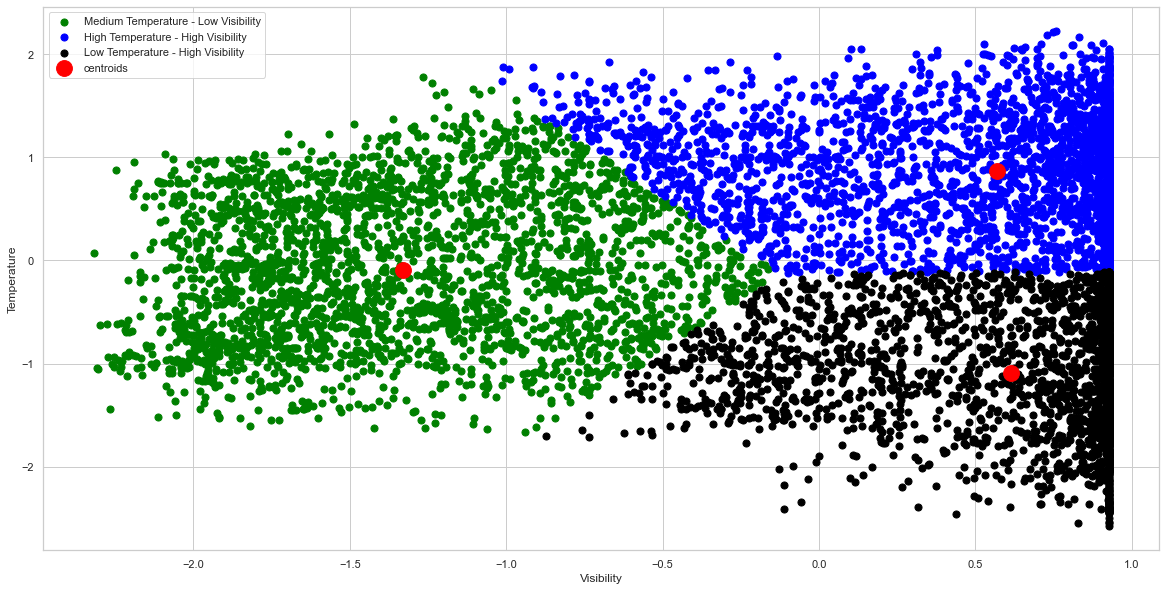

In [61]:
plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 50, c = 'green', label = "Medium Temperature - Low Visibility")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 50, c = 'blue', label = "High Temperature - High Visibility")
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = 50, c = 'black', label = "Low Temperature - High Visibility")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=250,  c = "red", label = "centroids")
plt.xlabel("Visibility")
plt.ylabel("Temperature")
plt.legend()
plt.show()

### Expectation Maximazation Clustering

In [62]:
x = XScaled.iloc[:,[4,1]].values
XScaled.iloc[:,[4,1]].head()

Visibility (10m)  Temperature(°C)
0          0.925871        -1.513957
1          0.925871        -1.539074
2          0.925871        -1.580936
3          0.925871        -1.597680
4          0.925871        -1.580936

In [63]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(x)
yclust=gmm.predict(x)
yclust

array([0, 0, 0, ..., 1, 1, 1])

In [64]:
Dataset['Cluster_EM']=yclust
Dataset.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  Functioning Day  Spring  Summer  Winter  Cluster_KM  Cluster_EM  
0        0                1       0       0       1           2           0  
1        0                1       0       0       1           2           0  
2        0                1       0       0       1           2           0  
3        0                1       0       0       1           2           0  
4        0                1       0       0       1           2           0

In [65]:
DatasetClust = Dataset.groupby(['Cluster_EM'])
DatasetClust.mean()

Rented Bike Count       Hour  Temperature(°C)  Humidity(%)  \
Cluster_EM                                                               
0                  815.785030  12.162750        12.911923    50.401654   
1                  756.942336  11.984229        12.661311    48.461311   
2                  623.010151  10.934807        12.969321    66.751861   

            Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  \
Cluster_EM                                                                
0                   1.793429       1999.966057                 0.411989   
1                   2.006752       1895.469690                 0.925195   
2                   1.560388        934.979472                 0.487580   

            Rainfall(mm)  Snowfall (cm)   Holiday  Functioning Day    Spring  \
Cluster_EM                                                                     
0               0.009399       0.036292  0.073542         0.957354  0.166232   
1               0.052735       0.055347  0.048300         0.966486  0.189749   
2               0.264809       0.104196  0.037221         0.970900  0.325062   

              Summer    Winter  Cluster_KM  
Cluster_EM                                  
0           0.243255  0.235857    1.409922  
1           0.280434  0.302119    1.456875  
2           0.243627  0.226709    0.549064

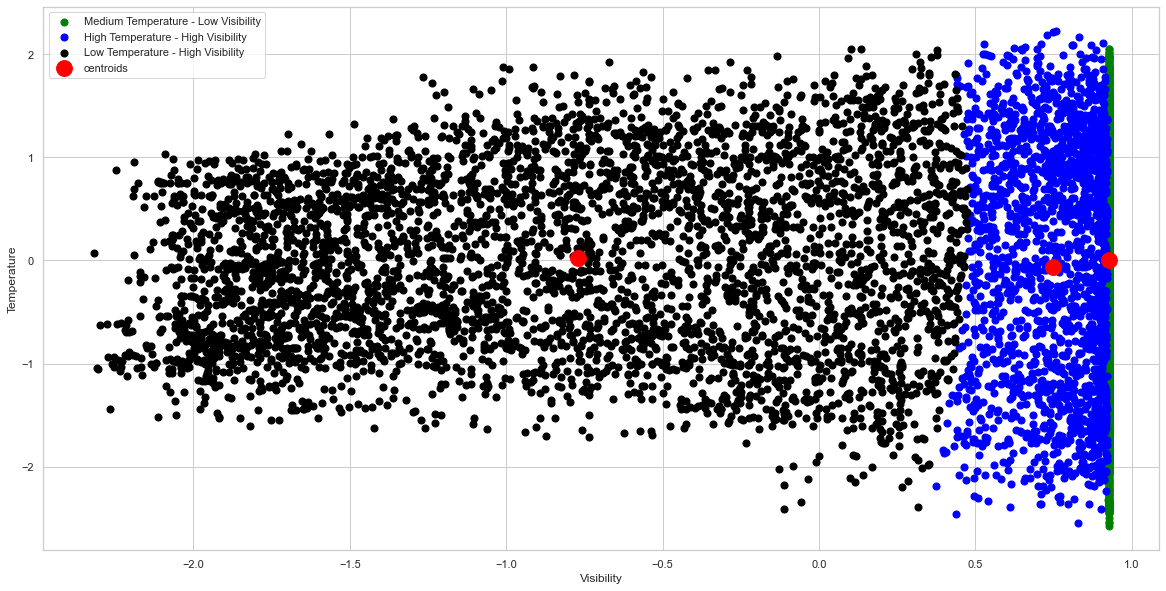

In [66]:
plt.figure(figsize = (20,10))
plt.scatter(x[yclust == 0,0],x[yclust == 0,1],s = 50, c = 'green', label = "Medium Temperature - Low Visibility")
plt.scatter(x[yclust == 1,0],x[yclust == 1,1],s = 50, c = 'blue', label = "High Temperature - High Visibility")
plt.scatter(x[yclust == 2,0],x[yclust == 2,1],s = 50, c = 'black', label = "Low Temperature - High Visibility")
plt.scatter(gmm.means_[:,0],gmm.means_[:,1],s=250,  c = "red", label = "centroids")
plt.xlabel("Visibility")
plt.ylabel("Temperature")
plt.legend()
plt.show()

### Decision Tree For Dimensionlity Reduction

In [67]:
Dataset=Dataset.drop(['Cluster_KM','Cluster_EM'],axis=1)

In [68]:
X = Dataset.drop("Rented Bike Count", axis=1)
y = Dataset['Rented Bike Count']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [70]:
X_train.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
1444     4            -11.1           50               1.2              1986   
1652    20             -5.8           44               2.1              1994   
7496     8             11.4           66               0.8              1991   
1893    21             -2.3           38               2.3              2000   
3880    16             19.1           54               3.2               542   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
1444                     0.00           0.0            0.0        0   
1652                     0.00           0.0            0.0        0   
7496                     0.18           0.0            0.0        1   
1893                     0.00           0.0            0.0        1   
3880                     0.94           0.0            0.0        0   

      Functioning Day  Spring  Summer  Winter  
1444                1       0       0       1  
1652                1       0       0       1  
7496                0       0       0       0  
1893                1       0       0       1  
3880                1       1       0       0

In [71]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [72]:
importances_features = decisionTree.feature_importances_
importances_features

array([0.10490266, 0.18767372, 0.16574238, 0.16853064, 0.1612286 ,
       0.09536551, 0.0110929 , 0.01049077, 0.01433408, 0.03316612,
       0.02847331, 0.01326441, 0.00573489])

##### From the above we can identify 7 important feature and they are Hour,Temp,Humidity,WindSpeed,visibility,Solar Radiation and Functioning Day

## Principal Component Analysis

In [73]:
XScaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hour                     8760 non-null   float64
 1   Temperature(°C)          8760 non-null   float64
 2   Humidity(%)              8760 non-null   float64
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   float64
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Holiday                  8760 non-null   float64
 9   Functioning Day          8760 non-null   float64
 10  Spring                   8760 non-null   float64
 11  Summer                   8760 non-null   float64
 12  Winter                   8760 non-null   float64
dtypes: float64(13)
memory usage: 889.8 KB


In [74]:
covMatrix = np.cov(XScaled,rowvar=False)

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
pca.fit(XScaled)

PCA(n_components=13)

In [76]:
print(pca.explained_variance_)

[2.42661847 2.23944249 1.4399126  1.16149635 1.04210278 0.97314916
 0.92134183 0.82853552 0.70636048 0.6195068  0.30176173 0.2183964
 0.12285957]


In [77]:
print(pca.explained_variance_ratio_)

[0.18664165 0.17224514 0.11074986 0.08933567 0.0801526  0.07484908
 0.07086436 0.06372623 0.05432922 0.04764893 0.02320979 0.01679781
 0.00944966]


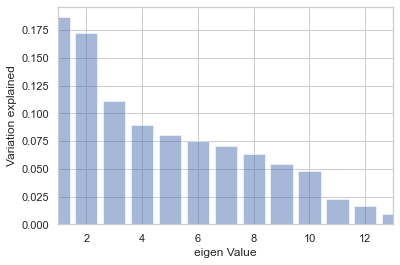

In [78]:
plt.bar(list(range(1,14)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.xlim(1,13)
plt.show()

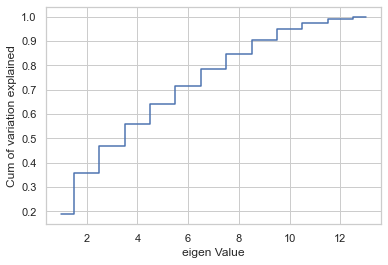

In [79]:
plt.step(list(range(1,14)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

##### Now 8 dimensions seems very reasonable. With 8 variables we can explain over 80%-85% of the variation in the original data!

In [80]:
pca8 = PCA(n_components=8)
pca8.fit(XScaled)
#print(pca8.components_)
print(pca8.explained_variance_ratio_)
XScaledpca8 = pca8.transform(XScaled)

[0.18664165 0.17224514 0.11074986 0.08933567 0.0801526  0.07484908
 0.07086436 0.06372623]


## Independent Component Analysis

In [81]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=13)
ica.fit(XScaled)
XScaledica = ica.transform(XScaled)

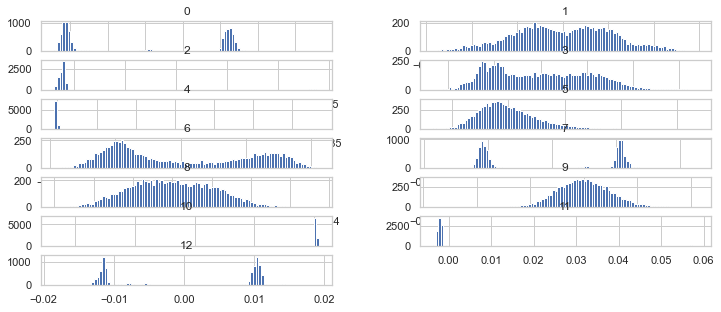

In [82]:
columns = list(pd.DataFrame(XScaledica))[:]
pd.DataFrame(XScaledica)[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(42,2));

##### From above we can see that all features have been transformed and distributed normally and are mutually indepenednt

### Randomized Projections


In [83]:
from sklearn.random_projection import GaussianRandomProjection
randomprojector = GaussianRandomProjection(n_components=10)
randomprojector.fit(XScaled)
bikedataScaledrandomproject=randomprojector.transform(XScaled)

In [84]:
randomprojdf=pd.DataFrame(bikedataScaledrandomproject)
randomprojdf.head()

0         1         2         3         4         5         6  \
0  0.244161  0.789927  0.281439  0.768781 -2.068068  0.876381 -0.160547   
1  0.928959  0.469779  0.190541  0.694590 -1.931932  0.982096  0.070340   
2  0.889310  0.552883  0.200182  0.791774 -1.913490  0.950714  0.073920   
3  0.982347  0.543095  0.188102  0.858287 -1.869236  0.942332  0.116186   
4  0.469988  0.849241  0.314267  0.985321 -2.019824  0.761599 -0.209099   

          7         8         9  
0 -0.972524  1.537643  0.454997  
1 -0.048990  1.536036  0.356278  
2 -0.197599  1.546234  0.416471  
3 -0.129211  1.547419  0.441706  
4 -1.089702  1.519772  0.440293

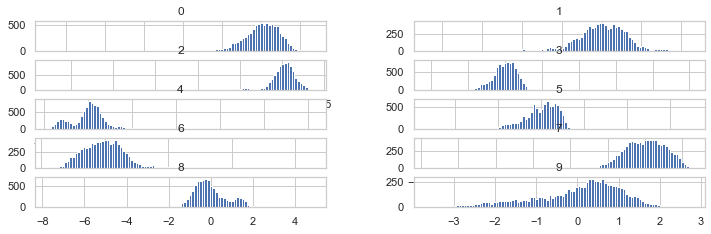

In [85]:
columns = list(pd.DataFrame(bikedataScaledrandomproject))[:]
pd.DataFrame(bikedataScaledrandomproject)[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(42,2)); 

##### For Time Being we are taking 10 features as random projection subset we might need to experiment with nr of componenets during training the model and adjust the nr of feature to achieve the good performance for now we are taking as 10

### K Means on PCA

In [86]:
XScaledpca8=pd.DataFrame(XScaledpca8)
x = XScaledpca8.iloc[:,[4,1]].values
XScaledpca8.iloc[:,[4,1]].head()

4         1
0 -0.624718 -0.336590
1 -0.747966  0.190380
2 -0.691487  0.101510
3 -0.667668  0.126248
4 -0.494039 -0.568051

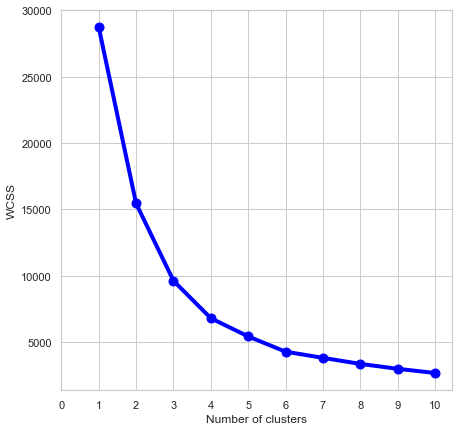

In [87]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=9,marker='o',color = 'blue')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [88]:
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)
Dataset['Cluster']=model.labels_
Dataset.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  Functioning Day  Spring  Summer  Winter  Cluster  
0        0                1       0       0       1        0  
1        0                1       0       0       1        1  
2        0                1       0       0       1        1  
3        0                1       0       0       1        1  
4        0                1       0       0       1        0

In [89]:
DatasetClust = Dataset.groupby(['Cluster'])
DatasetClust.mean()

Rented Bike Count       Hour  Temperature(°C)  Humidity(%)  \
Cluster                                                               
0               975.456004  14.797443        14.015693    43.544748   
1               509.587457   8.234934        11.762126    72.395394   
2               291.849057  11.753266        12.964877    59.280116   

         Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  \
Cluster                                                                
0                2.264026       1734.869140                 1.041123   
1                1.190642       1138.613180                 0.118317   
2                1.768940       1478.058055                 0.507112   

         Rainfall(mm)  Snowfall (cm)   Holiday  Functioning Day    Spring  \
Cluster                                                                     
0            0.002156       0.033793  0.007270         1.000000  0.250940   
1            0.184174       0.123567  0.004410         1.000000  0.270211   
2            0.786792       0.026705  0.558781         0.571843  0.150943   

           Summer    Winter  
Cluster                      
0        0.263224  0.265981  
1        0.267516  0.226605  
2        0.095791  0.252540

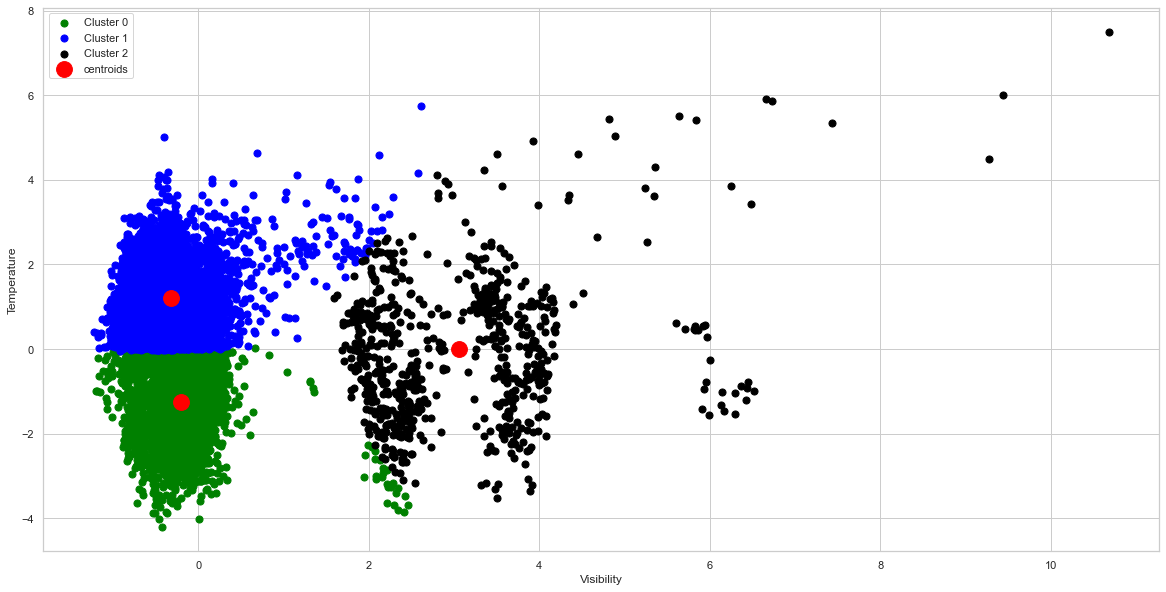

In [90]:
plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 50, c = 'green', label = "Cluster 0")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 50, c = 'blue', label = "Cluster 1")
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = 50, c = 'black', label = "Cluster 2")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=250,  c = "red", label = "centroids")
plt.xlabel("Visibility")
plt.ylabel("Temperature")
plt.legend()
plt.show()

### Applying K Means on ICA

In [91]:
XScaledica=pd.DataFrame(XScaledica)
XScaledica.head()

0         1         2         3         4         5         6   \
0 -0.010659 -0.013038 -0.003452 -0.009853 -0.000073  0.006725  0.013915   
1 -0.010644 -0.012664 -0.003245 -0.009259 -0.000004 -0.009726  0.013951   
2 -0.010631 -0.011913 -0.003220 -0.009406 -0.000090 -0.007638  0.012691   
3 -0.010615 -0.011153 -0.003173 -0.009423 -0.000142 -0.009038  0.011666   
4 -0.010697 -0.010062 -0.003353 -0.010562 -0.000137  0.006107  0.008931   

         7         8         9         10        11        12  
0 -0.010696 -0.004278 -0.009943  0.003818 -0.002184 -0.010940  
1 -0.011005 -0.002070 -0.006266  0.003525 -0.001972 -0.010930  
2 -0.011063 -0.000676 -0.005142  0.003564 -0.001983 -0.010959  
3 -0.011144  0.000352 -0.003581  0.003535 -0.001953 -0.010985  
4 -0.010975 -0.000715 -0.008622  0.003783 -0.002149 -0.011021

In [92]:
x = XScaledica.iloc[:,[4,1]].values
XScaledica.iloc[:,[4,1]].head()

4         1
0 -0.000073 -0.013038
1 -0.000004 -0.012664
2 -0.000090 -0.011913
3 -0.000142 -0.011153
4 -0.000137 -0.010062

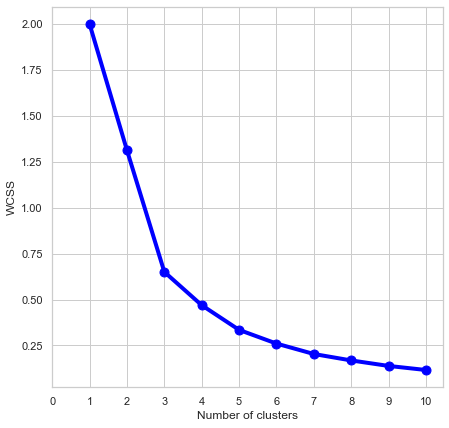

In [93]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=9,marker='o',color = 'blue')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [94]:
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)
Dataset['Cluster']=model.labels_
Dataset.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  Functioning Day  Spring  Summer  Winter  Cluster  
0        0                1       0       0       1        0  
1        0                1       0       0       1        0  
2        0                1       0       0       1        0  
3        0                1       0       0       1        0  
4        0                1       0       0       1        0

In [95]:
DatasetClust = Dataset.groupby(['Cluster'])
DatasetClust.mean()

Rented Bike Count       Hour  Temperature(°C)  Humidity(%)  \
Cluster                                                               
0               654.087537   8.884189        12.517462    49.524768   
1                80.850000  13.950000        20.390000    97.100000   
2               776.089269  14.239079        13.133238    66.237179   
3                94.280374  11.299065        16.726168    95.140187   

         Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  \
Cluster                                                                
0                1.843542       1747.300158                 0.974035   
1                1.795000        629.100000                 0.050000   
2                1.606244       1137.452517                 0.158609   
3                1.481308        544.373832                 0.094766   

         Rainfall(mm)  Snowfall (cm)   Holiday  Functioning Day    Spring  \
Cluster                                                                     
0            0.011264       0.074124  0.052024         0.962000  0.232979   
1           18.175000       0.000000  0.000000         0.950000  0.250000   
2            0.075546       0.075427  0.047246         0.970560  0.270655   
3            5.336449       0.114019  0.028037         0.981308  0.308411   

           Summer    Winter  
Cluster                      
0        0.246777  0.258086  
1        0.550000  0.000000  
2        0.252137  0.240028  
3        0.411215  0.074766

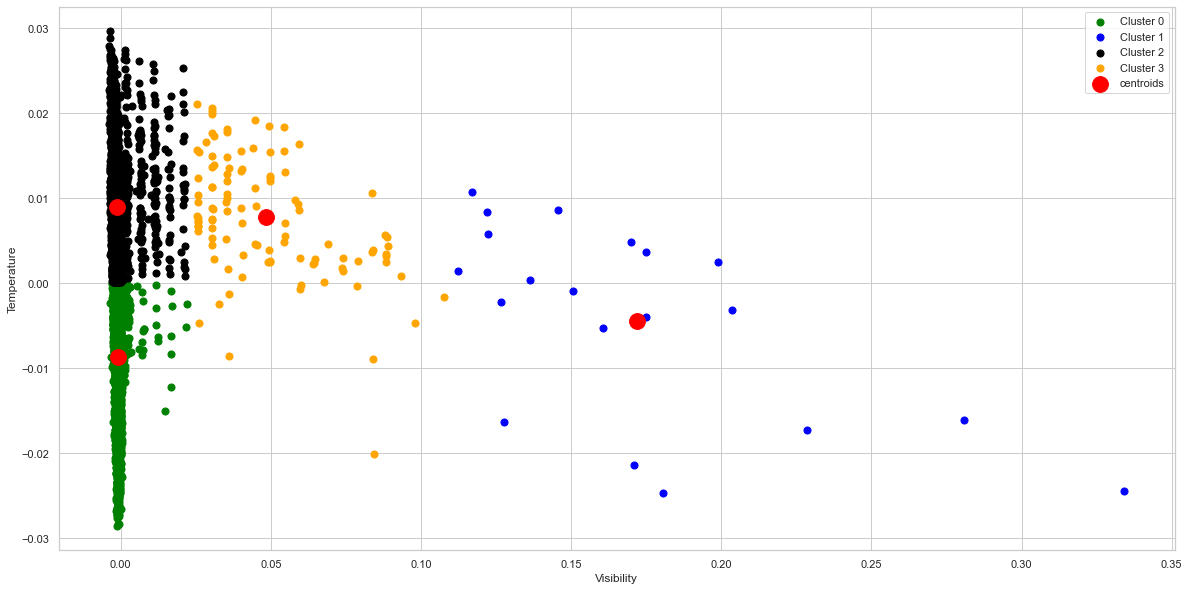

In [96]:
plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 50, c = 'green', label = "Cluster 0")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 50, c = 'blue', label = "Cluster 1")
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = 50, c = 'black', label = "Cluster 2")
plt.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],s = 50, c = 'orange', label = "Cluster 3")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=250,  c = "red", label = "centroids")
plt.xlabel("Visibility")
plt.ylabel("Temperature")
plt.legend()
plt.show()

### Applying K Means on RCA

In [97]:
x = randomprojdf.iloc[:,[4,1]].values
randomprojdf.iloc[:,[4,1]].head()

4         1
0 -2.068068  0.789927
1 -1.931932  0.469779
2 -1.913490  0.552883
3 -1.869236  0.543095
4 -2.019824  0.849241

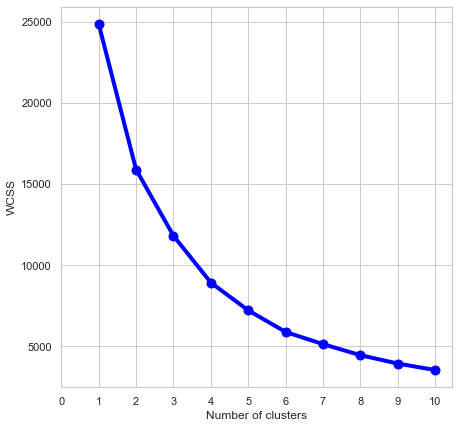

In [98]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=9,marker='o',color = 'blue')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [99]:
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)
Dataset['Cluster']=model.labels_
Dataset.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  Functioning Day  Spring  Summer  Winter  Cluster  
0        0                1       0       0       1        0  
1        0                1       0       0       1        0  
2        0                1       0       0       1        0  
3        0                1       0       0       1        0  
4        0                1       0       0       1        0

In [100]:
DatasetClust = Dataset.groupby(['Cluster'])
DatasetClust.mean()

Rented Bike Count       Hour  Temperature(°C)  Humidity(%)  \
Cluster                                                               
0               350.092654  10.599781        -0.823739    43.135965   
1               800.874079  11.588759        18.858231    66.191339   
2               795.135598  11.867663        14.389810    58.658424   

         Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  \
Cluster                                                                
0                1.962281       1744.802632                 0.288503   
1                1.486087       1175.188268                 0.555230   
2                1.818560       1515.668750                 0.720476   

         Rainfall(mm)  Snowfall (cm)   Holiday  Functioning Day    Spring  \
Cluster                                                                     
0            0.001206       0.052193  0.000000         1.000000  0.007675   
1            0.170639       0.172727  0.124693         1.000000  0.069717   
2            0.202364       0.000000  0.007065         0.919837  0.534511   

           Summer    Winter  
Cluster                      
0        0.052632  0.789474  
1        0.570946  0.220516  
2        0.068750  0.000543

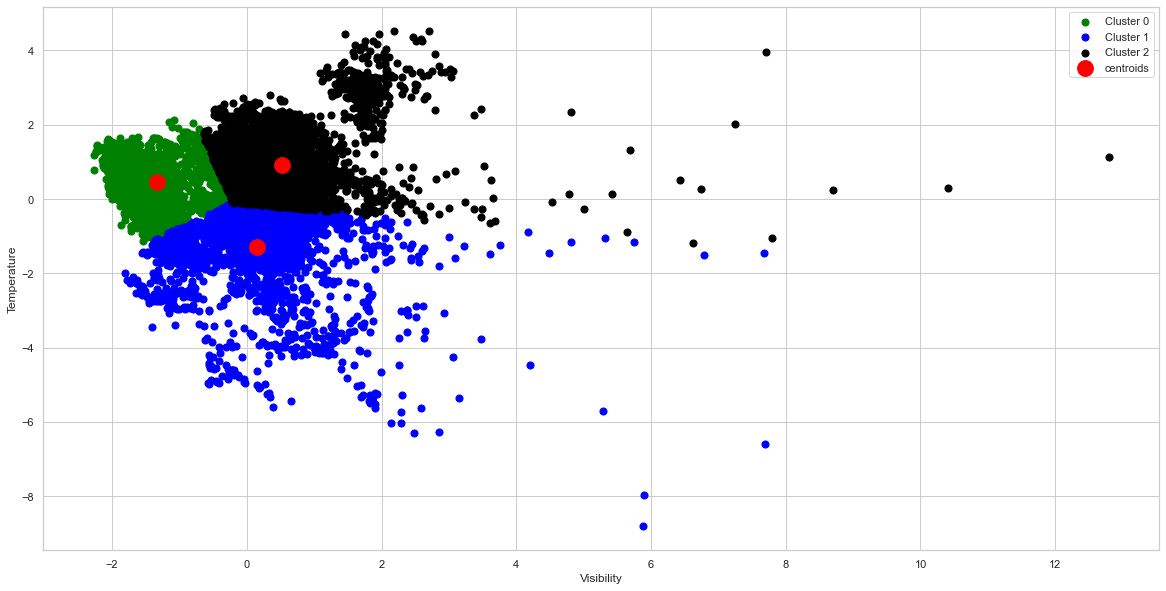

In [101]:
plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 50, c = 'green', label = "Cluster 0")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 50, c = 'blue', label = "Cluster 1")
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = 50, c = 'black', label = "Cluster 2")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=250,  c = "red", label = "centroids")
plt.xlabel("Visibility")
plt.ylabel("Temperature")
plt.legend()
plt.show()

##### From above analysis we can say that PCA helped in clustering as it has moved all the data points towards centroid, though all feature transformations has done the same but PCA has made same distribution across all cluster where as ICA and RCA has failed to do so .

### Applying Neural Network On Complete Feature Set


In [102]:
class_names = [0,1]

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=.30, random_state=42)

In [104]:
X_train.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
1444 -1.083473        -2.007923    -0.404015         -0.506551   
1652  1.227936        -1.564191    -0.698693          0.361973   
7496 -0.505621        -0.124155     0.381791         -0.892561   
1893  1.372399        -1.271160    -0.993370          0.554978   
3880  0.650084         0.520513    -0.207564          1.423502   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
1444          0.902855                -0.655132       -0.1318      -0.171891   
1652          0.916007                -0.655132       -0.1318      -0.171891   
7496          0.911075                -0.447925       -0.1318      -0.171891   
1893          0.925871                -0.655132       -0.1318      -0.171891   
3880         -1.471114                 0.426949       -0.1318      -0.171891   

       Holiday  Functioning Day    Spring    Summer    Winter  
1444 -0.227757         0.186680 -0.580514 -0.580514  1.748015  
1652 -0.227757         0.186680 -0.580514 -0.580514  1.748015  
7496  4.390647        -5.356764 -0.580514 -0.580514 -0.572078  
1893  4.390647         0.186680 -0.580514 -0.580514  1.748015  
3880 -0.227757         0.186680  1.722612 -0.580514 -0.572078

In [ ]:
from sklearn.neural_network import MLPClassifier
start_time=time.time()
nnfullfeature=MLPClassifier(hidden_layer_sizes=(25,25),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
nnfullfeature.fit(X_train,y_train)
end_time=time.time()
Timetakenbymodel=end_time-start_time
print(Timetakenbymodel)
print(nnfullfeature.score(X_train,y_train))
print(nnfullfeature.score(X_test,y_test))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        nnfullfeature,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
y_pred = nnfullfeature.predict(X_test) 
nnfullfeature.score(X_test, y_pred)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for final nueral network Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Applying Neural Network on Decision Tree Dimensioanlity Reduction Feature Set


In [ ]:
Dataset.info()

In [ ]:
decisionTree=Dataset[["Rented Bike Count","Hour","Temperature(°C)","Humidity(%)","Wind speed (m/s)","Visibility (10m)","Solar Radiation (MJ/m2)","Functioning Day"]]
decisionTree.head()

In [ ]:
X = bikedatadecisiontree.drop("Rented Bike Count", axis=1)
y = bikedatadecisiontree['Rented Bike Count']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrain_transform=sc.fit_transform(X_train)

In [ ]:
Xtest_transform=sc.fit_transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
start_time=time.time()
nndecisionmodel=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
nndecisionmodel.fit(Xtrain_transform,y_train)
end_time=time.time()
Timetaken=end_time-start_time
print(Timetaken)
print(nndecisionmodel.score(Xtrain_transform,y_train))
print(nndecisionmodel.score(Xtest_transform,y_test))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        nndecisionmodel,
        Xtest_transform,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
y_pred = nndecisionmodel.predict(Xtest_transform) # This will give you positive class prediction probabilities  
nndecisionmodel.score(Xtest_transform, y_pred)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for final nueral network Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')